<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/nn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import matplotlib.pyplot as plt
n=100
np.random.seed(1)
tx=(np.random.rand(n,2)*n).astype(np.int32)+1

In [214]:
print(tx)

[[ 42  73]
 [  1  31]
 [ 15  10]
 [ 19  35]
 [ 40  54]
 [ 42  69]
 [ 21  88]
 [  3  68]
 [ 42  56]
 [ 15  20]
 [ 81  97]
 [ 32  70]
 [ 88  90]
 [  9   4]
 [ 17  88]
 [ 10  43]
 [ 96  54]
 [ 70  32]
 [ 69  84]
 [  2  76]
 [ 99  75]
 [ 29  79]
 [ 11  45]
 [ 91  30]
 [ 29  14]
 [  2  68]
 [ 22  27]
 [ 50   6]
 [ 58  15]
 [ 59  70]
 [ 11  42]
 [ 70  42]
 [  5  54]
 [ 67  52]
 [ 95  59]
 [ 91  14]
 [ 14  81]
 [ 40  17]
 [ 93  35]
 [ 76  73]
 [ 89  63]
 [ 76  35]
 [ 27  90]
 [ 43  97]
 [ 67  63]
 [ 12  95]
 [ 45  58]
 [ 41  24]
 [ 91  58]
 [  1  62]
 [ 33  53]
 [ 89  36]
 [ 91  63]
 [  2  93]
 [ 70 100]
 [ 18  14]
 [ 94  70]
 [  7  76]
 [ 76  93]
 [ 72  13]
 [  2   3]
 [  3  25]
 [ 87  54]
 [ 56  85]
 [ 13  28]
 [ 59  97]
 [ 57   2]
 [ 81  24]
 [ 81  39]
 [ 87  75]
 [ 56  14]
 [  6  13]
 [  5  11]
 [ 23  72]
 [ 56   2]
 [  8  97]
 [ 57  21]
 [ 26  75]
 [ 20  59]
 [ 98  85]
 [ 24  50]
 [ 62  83]
 [ 16   2]
 [  8  49]
 [ 61  57]
 [ 32  99]
 [ 58  39]
 [ 56  75]
 [ 67  27]
 [  7  38]
 [ 63  22]

In [215]:
ty= (tx.min(axis=1) / tx.max(axis=1) <= 0.4).astype(np.int32)


In [216]:
print(ty)

[0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0]


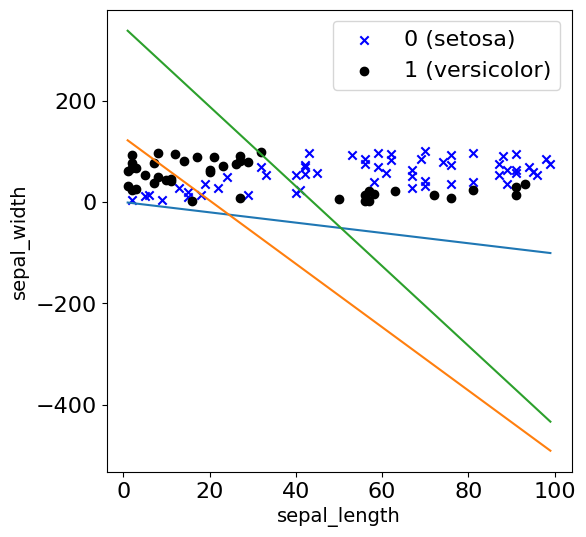

In [221]:
# 산점도 표시
x_t0 = tx[ty == 0]
x_t1 = tx[ty == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
xl=np.asarray([tx[:,0].min(),tx[:,0].max()])
plt.plot(xl,-((w[0]+w[1]*xl)/w[2]))
plt.plot(xl,-((model_lr.intercept_[0]+model_lr.coef_[0][1]*xl)/model_lr.coef_[0][2]))
plt.plot(xl,-((model_svm.intercept_[0]+model_svm.coef_[0][1]*xl)/model_svm.coef_[0][2]))
plt.show()

In [ ]:
tx=np.insert(tx,0,1,axis=1)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def pred(x,w):
  return sigmoid(np.dot(x,w))

In [ ]:
m=tx.shape[0]

In [ ]:
print(m)

In [ ]:
d=tx.shape[1]
w=np.ones(d)
yp=pred(tx,w)

In [ ]:
print(d)

In [ ]:
# 손실함수(교차 엔트로피 함수)
def cross_entropy(yt, yp):
    # 교차 엔트로피의 계산 (이 단계에서는 벡터)
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # 교차 엔트로피 벡터의 평균값을 계산
    return(np.mean(ce1))

In [ ]:
# 예측 결과의 확률값에서 0이나 1을 판단하는 함수
def classify(y):
    return np.where(y < 0.5, 0, 1)

In [ ]:
# 모델을 평가하는 함수
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):

    # 예측값 계산
    yp = pred(xt, w)

    # 손실함수 값 계산
    loss = cross_entropy(yt, yp)

    # 예측값(확률값)을 0이나 1로 변환
    yp_b = classify(yp)

    # 정확도 산출
    score = accuracy_score(yt, yp_b)
    return loss, score

In [ ]:
iters=100
alpha=0.01

In [ ]:
history=np.zeros((0,3))

In [ ]:
for k in range(iters):
  yp=pred(tx,w)
  yd=ty-yp
  grad=np.dot(tx.T,yd)/m
  w=w-alpha*grad

In [ ]:
if(k % 10==0):
  loss, score=evaluate(tx,ty,w)
  history=np.vstack((history,[k,loss,score]))
  print(k,loss,score)


In [ ]:
print(w)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# 모델 생성
model_lr = LogisticRegression(solver='liblinear')
model_svm = svm.SVC(kernel='linear')

# 기계 학습 실시
model_lr.fit(tx, ty)
model_svm.fit(tx, ty)

In [ ]:
print(model_lr.coef_)
print(model_svm.coef_)

In [ ]:
# 선형 회귀
# 절편의 값
lr_w0 = model_lr.intercept_[0]
# x1(sepal_length)의 계수
lr_w1 = model_lr.coef_[0,1]
# x2(sepal_width)의 계수
lr_w2 = model_lr.coef_[0,2]

# SVM
# 절편의 값
svm_w0 = model_svm.intercept_[0]
# x1(sepal_length)의 계수
svm_w1 = model_svm.coef_[0,1]
# x2(sepal_width)의 계수
svm_w2 = model_svm.coef_[0,2]

In [ ]:
def b(x, w):
    return(-(w[0] + w[1] * x)/ w[2])
# 산점도 x1의 최솟값과 최댓값
xl = np.asarray([tx[:,1].min(), tx[:,1].max()])
yl = b(xl, w)

In [ ]:
xl = np.asarray([tx[:,1].min(), tx[:,1].max()])
yl = b(xl, w)

In [ ]:
# 한계 직선 그리기용 x1의 값에서 x2의 값을 계산
def rl(x):
    wk = lr_w0 + lr_w1 * x
    wk2 = -wk / lr_w2
    return(wk2)
# 한계 직선 그리기용 x1의 값에서 x2의 값을 계산
def svm(x):
    wk = svm_w0 + svm_w1 * x
    wk2 = -wk / svm_w2
    return(wk2)
y_rl = rl(xl)
y_svm = svm(xl)
# 결과 확인
print(xl, yl, y_rl, y_svm)